In [1]:
%load_ext watermark
%watermark

2019-04-07T08:14:54-05:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


## Curvas de aprendizaje y validación

En esta sección vamos a ver 2 métodos gráficos muy útiles a la hora de validar modelos, los llamados **Curvas de Aprendizaje (learning curves)** y ** Curvas de Validación (validation curves)**

In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [10, 8]

#### Importamos datos

Para esta lección, vamos a usar el dataset **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)**, que contiene información sobre mas de 4000 vinos Portugueses (de la variedad *Vinho Verde*), y siendo la variable objetivo la puntuación del vino (asignada por expertos). Vamos a usar una versión modificada (uniendo vinos tintos y blancos en un solo dataset

In [3]:
vino = pd.read_csv("D:/datasets/Curso_Mauel_Garrido/vino.csv")

In [4]:
vino.shape

(6497, 14)

In [5]:
vino.head()

,pct_alcohol,cloruros,acido_citrico,densidad,acidez_fija,dioxido_azufre_libre,PH,puntuacion,azucar_residual,sulfitos,dioxido_azufre_total,vino_blanco,vino_tinto,acidez_volatil
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0,1,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,0,1,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,0,1,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,0,1,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,0,1,0.70


In [6]:
variables_indep = ["acidez_fija", "acidez_volatil", "acido_citrico", "azucar_residual",
                   "cloruros", "dioxido_azufre_libre", "dioxido_azufre_total", "densidad",
                   "PH", "sulfitos", "pct_alcohol", "vino_blanco", "vino_tinto"]
variable_dep = "puntuacion"

vino_X = vino[variables_indep]
vino_y = vino[variable_dep]

### Curvas de aprendizaje (Learning Curves)

las Curvas de Aprendizaje muestran el score (puntuación) del estimador tanto al estimar en los datos de entrenamiento como en validación cruzada, y muestran las variaciones de dichas puntuaciones al incrementar el tamaño de los datos de entrenamiento.  Ésto ayuda a ver si nuestro modelo se podría beneficiar de la obtención de más datos de entrenamiento (por que todavia tiene capacidad de "aprender" más) o si por el contrario, la complejidad del modelo no permite aprender más sin importar cuantos datos adicionales usemos para entrenar.

Por ejemplo, vamos a ver las curvas de aprendizaje para dos estimadores, Random Forest (bosques aleatorios) y AdaBoost.

In [7]:
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [8]:
estimador_rf = RandomForestRegressor()
estimador_ab = AdaBoostRegressor()

In [9]:
learning_curve??

La función `learning_curve` tiene un parámetro `train_size` que indica en que puntos queremos partir el dataset de entrenamiento para evaluar el estimador, Soporta ó enteros, que representarian tamaños concretos, (por ejemplo, calcular puntos de la curva para 100, 1000 y 10000 muestras), o decimales, que representarian porcentajes del tamaño total del dataset (por ejemplo, calcular puntuación del modelo para el 10% , el 50% y el 100% del dataset).

En concreto nosotros calcularemos 10 puntos distribuidos de forma uniforme sobre el total de dataset.

In [10]:
np.linspace(0.01, 1., 10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

En cuanto a la función de pérdidas, dado que es un problema de regresión pódemos usar el Error Cuadrático Medio (MSE). En scikit-learn el MSE se puede usar en todos aquellos casos donde se puede usar el parámetro `scoring`, y se llama `neg_mean_squared_error`. Se proporciona por defecto con un signo negativo.

In [11]:
train_sizes, train_scores, test_scores = learning_curve(
        estimador_ab, vino_X, vino_y, cv = 5, n_jobs = -1, scoring = "neg_mean_squared_error",
        train_sizes = np.linspace(0.01, 1., 10))

La funcion `learning_curve` devuelve 3 arrays, uno con los distintos tamaños del dataset que se han evaluado, otro con el score de entrenamiento y otro con el score de los datos de validacion cruzada (hemos usado 5 validaciones al especificar `cv=5`, por lo tanto para cada valor de train_sizes obtendremos 10 puntuaciones de test y de train.

In [12]:
train_sizes

array([  51,  623, 1195, 1766, 2338, 2910, 3481, 4053, 4625, 5197])

In [13]:
train_scores

array([[-0.00594258, -0.03401867, -0.0327694 , -0.02474359, -0.02646234],
       [-0.35661873, -0.31782959, -0.32738106, -0.31228277, -0.3164209 ],
       [-0.46398104, -0.33028711, -0.33407215, -0.33768796, -0.33381941],
       [-0.53434589, -0.44450168, -0.35425654, -0.36188223, -0.3683084 ],
       [-0.53835268, -0.46791119, -0.42376141, -0.44977362, -0.41475567],
       [-0.55226181, -0.47881901, -0.47816039, -0.48537981, -0.48550131],
       [-0.55744055, -0.51342595, -0.49591361, -0.49735255, -0.49401842],
       [-0.53775633, -0.52199317, -0.50289417, -0.51570648, -0.5154871 ],
       [-0.53452826, -0.50663549, -0.49925578, -0.51266662, -0.51732609],
       [-0.52505758, -0.4923449 , -0.49586652, -0.5017852 , -0.52076389]])

In [14]:
train_scores.shape

(10, 5)

In [15]:
test_scores.shape

(10, 5)

In [16]:
train_sizes

array([  51,  623, 1195, 1766, 2338, 2910, 3481, 4053, 4625, 5197])

In [17]:
vino_X.shape

(6497, 13)

In [18]:
train_sizes

array([  51,  623, 1195, 1766, 2338, 2910, 3481, 4053, 4625, 5197])

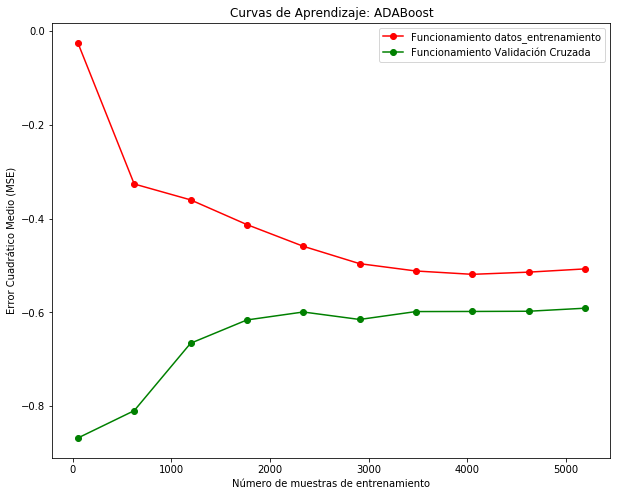

In [21]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curvas de Aprendizaje: ADABoost")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend();

Como vemos en la gráfica, la puntuación de entrenamiento empieza siendo mucho más alta que la de los datos de validacion cruzada. Sin embargo al incrementar el tamaño del dataset de entrenamiento el modelo empieza a aprender , con lo cual la puntuacion de validacion cruzada comienza a crecer. Llega un punto en el que ambas puntuaciones convergen, esto quiere decir que para este modelo en particular (Adaboost), añadir más datos de entrenamiento no va a mejorar el modelo, y necesitamos un modelo más complejo (que pueda generalizar más  y reducir su sesgo (bias en inglés)) si queremos mejorar los resultados.

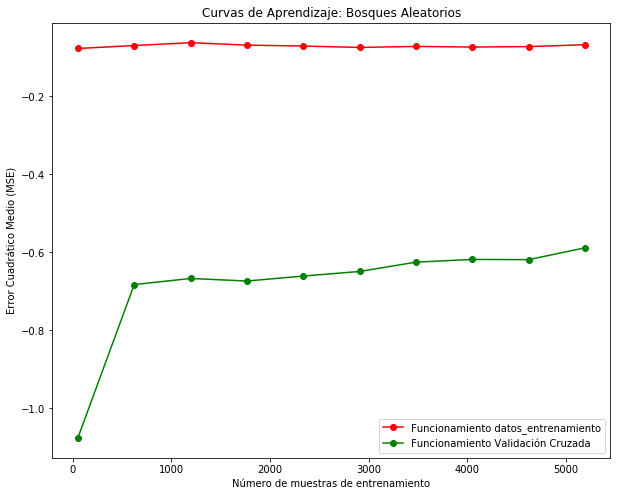

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
        estimador_rf, vino_X, vino_y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01,1., 10),
        scoring="neg_mean_squared_error")

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curvas de Aprendizaje: Bosques Aleatorios")

plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend();

Por el contrario, vemos que el estimador Random Forest podria beneficiarse de más datos de entrenamiento, que le ayudarían a generalizar mejor (reducir su sesgo (bias)).

### Curvas de validación

Hay veces en las que nos interesa ver cómo varia el performance de un modelo en función de sus hiperparámetros (los hiperparámetros de un modelo son aquellos parámetros que se definen antes de entrenarlo y que definen su proceso de entrenamiento), para ello podemos usar las llamadas *Curvas de validación*.

Son unas curvas similares a las curvas de aprendizaje, sin embargo, en vez de mostrar como varia el funcionamiento de un estimador en función del tamaño de los datos de entrenamiento, muestran cómo varia dicho funcionamiento en función de un hiperparámetro.

Por ejemplo, para el estimador de Bosques Aleatorios (Random Forests), un hiperparámetro es el número de árboles de decisión que queremos que tenga el bosque, otro sería la profundidad máxima de dichos árboles.

In [23]:
from sklearn.model_selection import validation_curve

In [24]:
n_arboles = [2,10,20,50,100,150,200]

El parámetro `param_range` de la funcion especifica los valores del parámetro que queremos probar. `param_name` define el nombre del parámetro en el modelo (n_estimators es como se definen el número de árboles en `RandomForestRegressor`.

In [25]:
print(RandomForestRegressor.__doc__)

A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is always the same as the original
    input sample size but the samples are drawn with replacement if
    `bootstrap=True` (default).

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : integer, optional (default=10)
        The number of trees in the forest.

        .. versionchanged:: 0.20
           The default value of ``n_estimators`` will change from 10 in
           version 0.20 to 100 in version 0.22.

    criterion : string, optional (default="mse")
        The function to measure the quality of a split. Supported criteria
        are "mse" for the mean squared error, which is equal to variance
        reduction as feature selection criterion, and "mae" for the mean

In [28]:
train_scores, test_scores = validation_curve(
    estimador_rf, vino_X, vino_y, param_name = "n_estimators", param_range = n_arboles,
    cv = 5, scoring = "neg_mean_squared_error", n_jobs = -1)

De forma similar a `learning_curve`, `validation_curve` devuelve las puntuaciones de entrenamiento y test para cada valor del rango, y dentro de cada valor, para cada iteración de la validación cruzada (definida como `cv=5`, por lo tanto estamos haciendo 10 validaciones distintas).

Calculamos las puntuaciones medias y hacemos los gráficos.

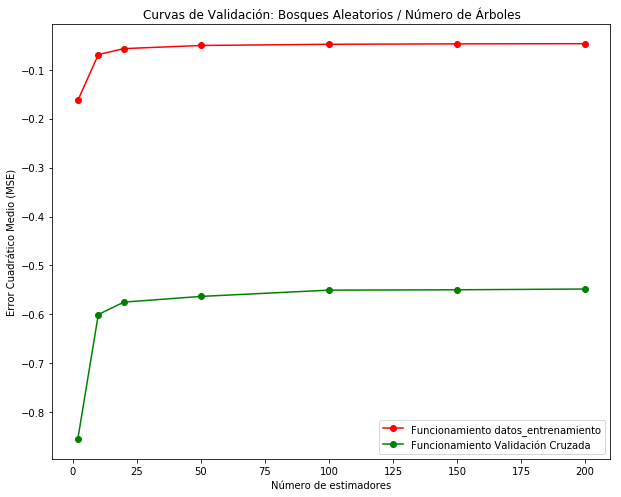

In [29]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(n_arboles, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(n_arboles, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curvas de Validación: Bosques Aleatorios / Número de Árboles")

plt.xlabel("Número de estimadores")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend();

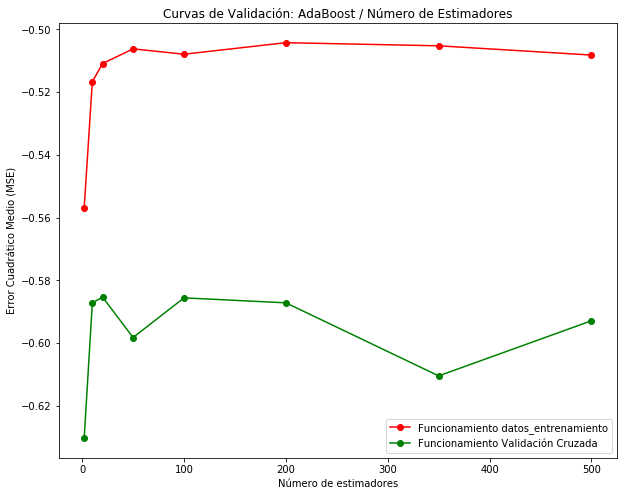

In [32]:
n_estimadores = [2,10,20,50,100,200,350, 500]

train_scores, test_scores = validation_curve(
    estimador_ab, vino_X, vino_y, param_name="n_estimators", param_range=n_estimadores,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(n_estimadores, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(n_estimadores, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curvas de Validación: AdaBoost / Número de Estimadores")

plt.xlabel("Número de estimadores")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend();

Ahora podemos volver a ver la curva de aprendizaje del Random Fores con 100 arboles (el valor óptimo).

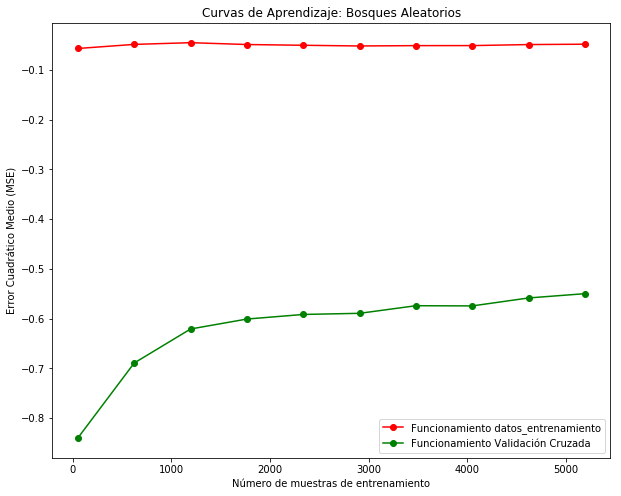

In [33]:
train_sizes, train_scores, test_scores = learning_curve(
        RandomForestRegressor(n_estimators=100), vino_X, vino_y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.01,1., 10),
        scoring="neg_mean_squared_error")

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Funcionamiento datos_entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Funcionamiento Validación Cruzada")
plt.title("Curvas de Aprendizaje: Bosques Aleatorios")

plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend();

Vemos que el modelo aprende más con 100 árboles que con 10.